In [ ]:
#| default_exp spiral

# Spiral

> API details.

In [ ]:
#| export
import numpy as np
import  matplotlib.pyplot as plt


In [ ]:
#| hide
from nbdev import *

In [ ]:
#| export
t = np.linspace(0,40,100)
v = 0.11 # velocity in rad/s
B = 8.6e-6 # spiral arm distance
r_max=800e-6 # max radius in rad
t_max=3.14*(r_max)**2/(B*v) # calculate resulting spiral duration

## Define a function which calculates
- phase
- radius
of spiral 

In [ ]:
#| export
def phi(B:float, # spiral arm distance
        v:float, # spiral angular velocity
        t:float, # time
        flag_out:int, # indicated if spiral goes out- or inwards
        t_max:float, # time for one outward spiral_count
        spiral_count:int ):# counts the number of performed spirals
    "compute phi and radius"
    if flag_out:
        phi1 = np.sqrt(4*np.pi/B*v*(t-t_max*(spiral_count)))

        r=B*phi1/(2*np.pi)
       # print(phi1)
        if r >= 800e-6:
            flag_out=0
            spiral_count=spiral_count+1
            #t_max=t
    else:
        if ((4*np.pi/B*v*((spiral_count+1)*t_max-t))>=0):
            phi1 = np.sqrt(4*np.pi/B*v*((spiral_count+1)*t_max-t))
            
        else:
            phi1=0.0
        r=B*phi1/(2*np.pi)
        if r <= 5e-6:
            flag_out=1  
            spiral_count=spiral_count+1  
    return phi1, flag_out, r, spiral_count


In [ ]:
#| hide
flag_out=1
t = np.linspace(0,12,1000)
phi_list=[]
time_list=[]
flag_out_list=[]
r_list=[]
spiral_count=0
spiral_count_list=[]
for i in t:
    #print(i)
    phi1,flag_out, r, spiral_count=phi(B,v,i, flag_out, t_max,spiral_count)
    #
    # print(phi1, flag_out)
    phi_list.append(phi1)
    time_list.append(i)
    flag_out_list.append(flag_out)
    r_list.append(r)
    spiral_count_list.append(spiral_count)


## Phase of spiral
The pase of the spiral has to grow and shrink for in and out going spirals as shown in @fig-polar.

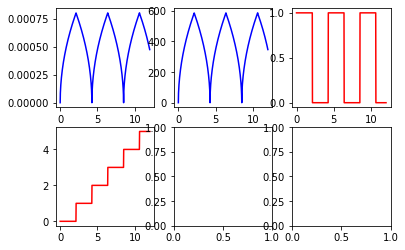

In [ ]:
#| label: fig-polar
#|echo: false
fig, axs = plt.subplots(2,3)

axs[0,0].plot(time_list,r_list, 'b')
axs[0,1].plot(time_list,phi_list, 'b')
axs[0,2].plot(time_list,flag_out_list, 'r')
axs[1,0].plot(time_list,spiral_count_list, 'r', label='D=1m')
# plt.title("Spiral vs time")
# plt.xlabel("time [s]")
# plt.ylabel("phi")
# show the plot
#plt.xlim((10,2e4))
#plt.ylim((1e-19,1e-12))
plt.show()

## Lets turn this into a class

In [ ]:
#| export 
class   DutPatLoop:
    """
    Class to implement DUT PAT loop for STB
    """

    
    def __init__(self):
        """
        Initialize LCT values
        

        Args:
            para_lct (dict): parameters for LCT
            para_system (dict): parameters for system, like max time, time steps, ...
            debug_flag (boolean): 1 if debug mode is on and print statements are active
        """
        self.B = 8.6e-6 # spiral arm distance
        self.v = 0.11 # spiral angular velocity
        
    def phi_method(self,
            B:float, # spiral arm distance
            v:float, # spiral angular velocity
            t:float, # time
            flag_out:int, # indicated if spiral goes out- or inwards
            t_max:float, # time for one outward spiral_count
            spiral_count:int ):# counts the number of performed spirals
        "compute phi and radius"
        if flag_out:
            phi1 = np.sqrt(4*np.pi/B*v*(t-t_max*(spiral_count)))

            r=B*phi1/(2*np.pi)
        # print(phi1)
            if r >= 800e-6:
                flag_out=0
                spiral_count=spiral_count+1
                #t_max=t
        else:
            if ((4*np.pi/B*v*((spiral_count+1)*t_max-t))>=0):
                phi1 = np.sqrt(4*np.pi/B*v*((spiral_count+1)*t_max-t))
                
            else:
                phi1=0.0
            r=B*phi1/(2*np.pi)
            if r <= 5e-6:
                flag_out=1  
                spiral_count=spiral_count+1  
        return phi1, flag_out, r, spiral_count

So we create a method which is the same function as before

In [ ]:
show_doc(DutPatLoop.phi_method)

---

#### DutPatLoop.phi_method

>      DutPatLoop.phi_method (B:float, v:float, t:float, flag_out:int,
>                             t_max:float, spiral_count:int)

compute phi and radius

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| B | float | spiral arm distance |
| v | float | spiral angular velocity |
| t | float | time |
| flag_out | int | indicated if spiral goes out- or inwards |
| t_max | float | time for one outward spiral_count |
| spiral_count | int | counts the number of performed spirals |

We create the necessary inputs

In [ ]:
t = np.linspace(0,40,100)
v = 0.11 # velocity in rad/s
B = 8.6e-6 # spiral arm distance
r_max=800e-6 # max radius in rad
t_max=3.14*(r_max)**2/(B*v) # calculate resulting spiral duration

instantiate the class  
`dut_pat_loop=DutPatLoop()`

In [ ]:
#| export

dut_pat_loop=DutPatLoop()

In [ ]:
#| hide
flag_out=1
t = np.linspace(0,12,1000)
phi_list_method=[]
time_list_method=[]
flag_out_list_method=[]
r_list_method=[]
spiral_count=0
spiral_count_list_method=[]
for i in t:
    #print(i)
    phi1,flag_out, r, spiral_count=dut_pat_loop.phi_method(B,v,i, flag_out, t_max,spiral_count)
    #
    # print(phi1, flag_out)
    phi_list_method.append(phi1)
    time_list_method.append(i)
    flag_out_list_method.append(flag_out)
    r_list_method.append(r)
    spiral_count_list_method.append(spiral_count)


## Plots of the phase of spiral
The plot ought to be the same as in @fig-polar.

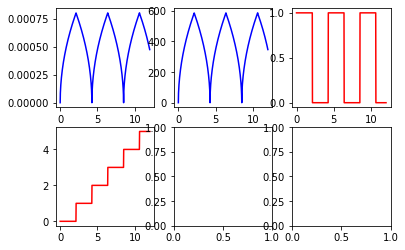

In [ ]:
#| label: fig-polar-method
#|echo: false
fig, axs = plt.subplots(2,3)

axs[0,0].plot(time_list_method,r_list_method, 'b')
axs[0,1].plot(time_list_method,phi_list_method, 'b')
axs[0,2].plot(time_list_method,flag_out_list_method, 'r')
axs[1,0].plot(time_list_method,spiral_count_list_method, 'r', label='D=1m')
# plt.title("Spiral vs time")
# plt.xlabel("time [s]")
# plt.ylabel("phi")
# show the plot
#plt.xlim((10,2e4))
#plt.ylim((1e-19,1e-12))
plt.show()